#Build a deep learning model that would learn from Environmental Sensor  Telemetry Data and predict the ppm of smoke based on the data recorded

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("iot_telemetry_data.csv")

In [ ]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
df.describe()

,ts,co,humidity,lpg,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.594858e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,1.994984e+05,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.594686e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.594858e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.595031e+09,0.005409,74.300003,0.008150,0.021838,23.600000
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,30.600000


In [ ]:
df.drop("device",inplace=True,axis=1)

In [ ]:
df

,ts,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...
405179,1.595203e+09,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.595203e+09,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.595203e+09,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.595203e+09,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['light'] = le.fit_transform(df['light'])
df['motion'] = le.fit_transform(df['motion'])


In [ ]:
df

,ts,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,1.594512e+09,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,1.594512e+09,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,1.594512e+09,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,1.594512e+09,0.004967,50.900000,0,0.007664,0,0.020448,22.600000
...,...,...,...,...,...,...,...,...
405179,1.595203e+09,0.003745,75.300003,0,0.006247,0,0.016437,19.200001
405180,1.595203e+09,0.005882,48.500000,0,0.008660,0,0.023301,22.200000
405181,1.595203e+09,0.004540,75.699997,1,0.007181,0,0.019076,26.600000
405182,1.595203e+09,0.003745,75.300003,0,0.006247,0,0.016437,19.200001


In [ ]:
#converting dataframe into array for simpler calculations

In [ ]:
data = df.values

In [ ]:
data

array([[1.59451209e+09, 4.95593865e-03, 5.10000000e+01, ...,
        0.00000000e+00, 2.04112701e-02, 2.27000000e+01],
       [1.59451209e+09, 2.84008861e-03, 7.60000000e+01, ...,
        0.00000000e+00, 1.32748367e-02, 1.97000008e+01],
       [1.59451210e+09, 4.97601234e-03, 5.09000000e+01, ...,
        0.00000000e+00, 2.04751256e-02, 2.26000000e+01],
       ...,
       [1.59520342e+09, 4.54046175e-03, 7.56999969e+01, ...,
        0.00000000e+00, 1.90759590e-02, 2.66000004e+01],
       [1.59520342e+09, 3.74462805e-03, 7.53000031e+01, ...,
        0.00000000e+00, 1.64367444e-02, 1.92000008e+01],
       [1.59520342e+09, 5.91448198e-03, 4.84000000e+01, ...,
        0.00000000e+00, 2.33995965e-02, 2.22000000e+01]])

In [ ]:
X = df.iloc[:,[0,1,2,3,4,5,7]]
y = df.iloc[:,[6]]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
y_scale = min_max_scaler.fit_transform(y)

In [ ]:
X_scale

array([[0.00000000e+00, 2.85701533e-01, 5.05060721e-01, ...,
        3.57314394e-01, 0.00000000e+00, 7.41830056e-01],
       [5.05687240e-07, 1.26009877e-01, 7.58097154e-01, ...,
        1.74493476e-01, 0.00000000e+00, 6.43790867e-01],
       [5.33411867e-06, 2.87216574e-01, 5.04048575e-01, ...,
        3.58929307e-01, 0.00000000e+00, 7.38562082e-01],
       ...,
       [9.99998414e-01, 2.54343831e-01, 7.55060686e-01, ...,
        3.23468624e-01, 0.00000000e+00, 8.69281047e-01],
       [9.99999588e-01, 1.94279083e-01, 7.51012165e-01, ...,
        2.56115302e-01, 0.00000000e+00, 6.27450998e-01],
       [1.00000000e+00, 3.58046627e-01, 4.78744932e-01, ...,
        4.32560998e-01, 0.00000000e+00, 7.25490187e-01]])

In [ ]:
model = Sequential([
    Dense(32, activation='relu',kernel_initializer='normal', input_shape=(7,)),
    Dense(32, activation='relu'),
     Dense(32, activation='relu'),

    Dense(1, activation='sigmoid'),
])

In [ ]:

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
hist = model.fit(X_scale, y_scale,
          batch_size=32, epochs=30)

Epoch 1/30
12662/12662 [==============================] - 26s 2ms/step - loss: 1.4896e-04
Epoch 2/30
12662/12662 [==============================] - 25s 2ms/step - loss: 1.4795e-06
Epoch 3/30
12662/12662 [==============================] - 25s 2ms/step - loss: 1.2031e-06
Epoch 4/30
12662/12662 [==============================] - 25s 2ms/step - loss: 9.8984e-07
Epoch 5/30
12662/12662 [==============================] - 26s 2ms/step - loss: 8.4653e-07
Epoch 6/30
12662/12662 [==============================] - 25s 2ms/step - loss: 7.6465e-07
Epoch 7/30
12662/12662 [==============================] - 26s 2ms/step - loss: 6.9037e-07
Epoch 8/30
12662/12662 [==============================] - 25s 2ms/step - loss: 5.6895e-07
Epoch 9/30
12662/12662 [==============================] - 24s 2ms/step - loss: 5.3542e-07
Epoch 10/30
12662/12662 [==============================] - 25s 2ms/step - loss: 4.9211e-07
Epoch 11/30
12662/12662 [==============================] - 25s 2ms/step - loss: 4.8542e-07
Epoch 12

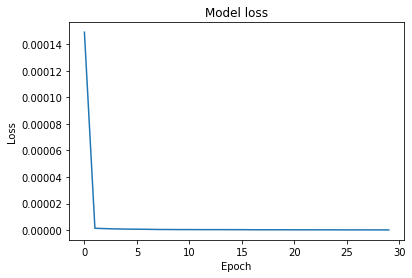

In [ ]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.evaluate(X,y)

12662/12662 [==============================] - 18s 1ms/step - loss: 0.9619


0.9618597030639648

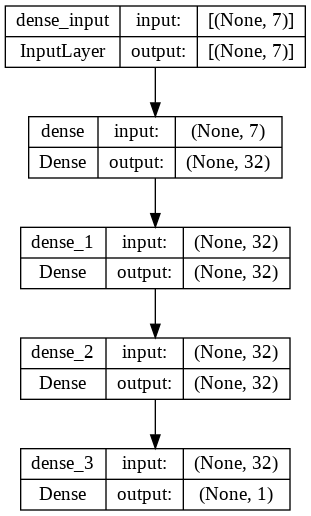

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
filename = "model.h5"
model.save(filename)